TRY OUT 3

In [1]:
#import module terkait
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
db = pd.read_csv('/Users/cindy/Desktop/BOTS/Data Science/Class Assignments/Class Test Projects/April 2021/Try Out Exercise I/melb_data.csv')
db.head()

#dataset=pd.DataFrame(boston['data'],columns=boston['feature_names'])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


SOAL I - EDA
1. Untuk feature/column Landsize & Price, hitung dan beri penjelasan (insight) terkait:

* Titik Pusat Data (Central Tendency) 
* Persebaran Data (Dispersion) 
* Distribusi Data (Distribution)

In [24]:
#central tendency - mean & median
db1 = db[['Landsize', 'Price']]
db1.describe()

,Landsize,Price
count,13580.000000,1.358000e+04
mean,558.416127,1.075684e+06
std,3990.669241,6.393107e+05
min,0.000000,8.500000e+04
25%,177.000000,6.500000e+05
50%,440.000000,9.030000e+05
75%,651.000000,1.330000e+06
max,433014.000000,9.000000e+06


Mean :
* Landsize = 558.416127
* Price = 1.075684e+06

Median :
* Landsize = 440.000000
* Price = 9.030000e+05

In [9]:
#central tendency - mode
db1.mode()

,Landsize,Price
0,0.0,1100000.0


array([[<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

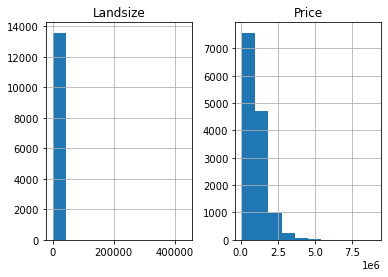

In [52]:
#distribution
#option 1
db1.hist()

#option 2
# plt.figure(figsize = (10, 8))

# sns.distplot(db1['Landsize'],  kde=False, label='Landsize')

# sns.distplot(db1['Price'],  kde=False,label='Price')

# plt.legend(prop={'size': 12})
# plt.title('Landsize vs Price')
# plt.xlabel('Price')
# plt.ylabel('Frequency')

Standard deviation adalah ukuran yang digunakan untuk mengukur jumlah variasi sekumpulan nilai data dari reratanya <br>
Standard deviation yang rendah untuk suatu variabel menunjukkan bahwa titik data cenderung mendekati meannya

2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

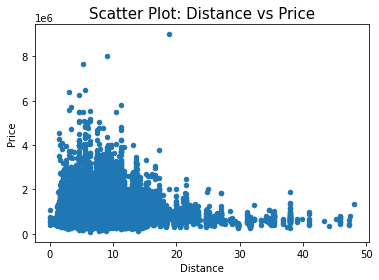

In [57]:
#option 1 - scatter plot
db.plot.scatter(x = 'Distance', y = 'Price') #create scatter plot using pandas
plt.title('Scatter Plot: Distance vs Price', size = 15) #add title
plt.show()

semakin jauh distancenya, harga property semakin akan semakin murah, namun tidak ada perbedaan bila dalam landsize dengan distance

/Users/cindy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


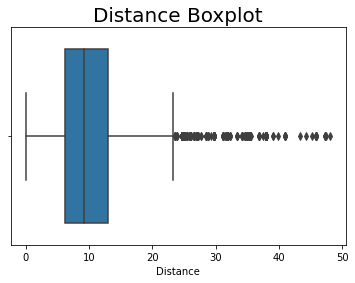

In [62]:
#option 2
sns.boxplot(db['Distance'])
plt.title('Distance Boxplot', size = 20)
plt.show()

3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

<function matplotlib.pyplot.show(close=None, block=None)>

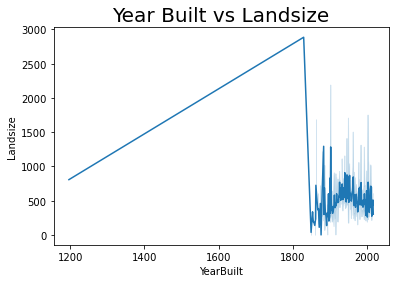

In [67]:
sns.lineplot(data = db, x = 'YearBuilt', y = 'Landsize')
plt.title('Year Built vs Landsize', size = 20)
plt.show

4. Tampilkan perkembangan rata-rata harga (Price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

In [6]:
# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="YearBuilt", y="Price", 
                     data=db, 
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="Price",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

ValueError: Image size of 1110816x504 pixels is too large. It must be less than 2^16 in each direction.

5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [4]:
db2 = db[['Landsize', 'Distance', 'Rooms', 'Price']]
db2Corr = db2.corr(method = 'spearman')
sns.heatmap(db2Corr*100, cmap="YlGn", annot= True, fmt=".0f")
plt.show()

,Landsize,Distance,Rooms,Price
Landsize,1.000000,0.025004,0.025678,0.037507
Distance,0.025004,1.000000,0.294203,-0.162522
Rooms,0.025678,0.294203,1.000000,0.496634
Price,0.037507,-0.162522,0.496634,1.000000


6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah:
* Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi! 
* Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi! 
* Metode penjualan properti (Method) yang paling sering dilakukan!

In [ ]:
topDb = db[db['Regionname'] == 'Southern Metropolitan']
topDb.groupby('CouncilArea').mean().sort_values('Price', ascending = False)['Price'].head(5)